In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Descargar los datos
<!-- **Link del dataset:https://www.kaggle.com/datasets/knightbearr/pizza-price-prediction-real-data** -->
**Link del dataset:https://www.kaggle.com/datasets/CooperUnion/cardataset**
<br>
MSRP : Manufacturer's Suggested Retail Price
<br>
HP : Horsepower 

## Lecturas de Datos

In [73]:
# El dataset sobre carros
df = pd.read_csv("data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [74]:
df = df[['Engine HP','MSRP']]
df

,Engine HP,MSRP
0,335.0,46135
1,300.0,40650
2,300.0,36350
3,230.0,29450
4,230.0,34500
...,...,...
11909,300.0,46120
11910,300.0,56670
11911,300.0,50620
11912,300.0,50920


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Engine HP  11845 non-null  float64
 1   MSRP       11914 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 186.3 KB


In [76]:
df.describe()

,Engine HP,MSRP
count,11845.00000,1.191400e+04
mean,249.38607,4.059474e+04
std,109.19187,6.010910e+04
min,55.00000,2.000000e+03
25%,170.00000,2.100000e+04
50%,227.00000,2.999500e+04
75%,300.00000,4.223125e+04
max,1001.00000,2.065902e+06


In [77]:
df.isnull().sum()

Engine HP    69
MSRP          0
dtype: int64

In [78]:
# Eliminar registros con valor "nan"
df = df.dropna()
df

,Engine HP,MSRP
0,335.0,46135
1,300.0,40650
2,300.0,36350
3,230.0,29450
4,230.0,34500
...,...,...
11909,300.0,46120
11910,300.0,56670
11911,300.0,50620
11912,300.0,50920


In [79]:
df.isnull().sum()

Engine HP    0
MSRP         0
dtype: int64

In [80]:
x_whole =df["Engine HP"]
y_whole = df["MSRP"]

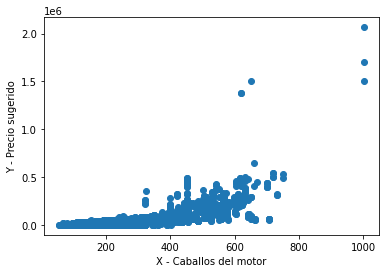

In [81]:
plt.scatter(x_whole, y_whole)
plt.xlabel('X - Caballos del motor')
plt.ylabel('Y - Precio sugerido')
plt.show()

## Normalización parte 1

In [82]:
x_mean = x_whole.mean(axis=0)
x_std = x_whole.std(axis=0)
y_mean = y_whole.mean(axis=0)
y_std = y_whole.std(axis=0)

In [83]:
# Dispersión de una distribución
print("x Media = ", x_mean, "   X Desviación estándar= ", x_std)
print("y Media = ", y_mean, "   y Desviación estándar = ", y_std)

x Media =  249.38607007176023    X Desviación estándar=  109.19187025917206
y Media =  40547.19560996201    y Desviación estándar =  60250.841749145395


## División de los datos (entrenamientos -70% y prueba -30%)

In [84]:
amount_x = len(x_whole)
amount_x

11845

In [85]:
len_train = (amount_x * 70) // 100
rest_len = amount_x - len_train
print("70 % = ", len_train)
print("30 % = ", rest_len)

70 % =  8291
30 % =  3554


In [86]:
x_train =  x_whole[0:len_train]
x_test =   x_whole [len_train+1:]  
y_train =  y_whole[0:len_train]
y_test  =  y_whole [len_train+1:] 

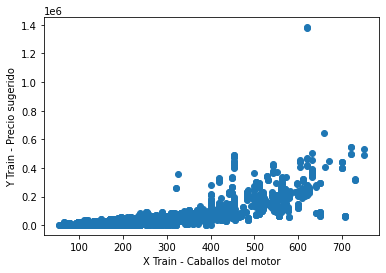

In [87]:
plt.scatter(x_train, y_train)
plt.xlabel('X Train - Caballos del motor')
plt.ylabel('Y Train - Precio sugerido')
plt.show()

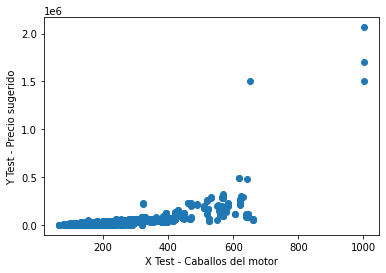

In [88]:
plt.scatter(x_test, y_test)
plt.xlabel('X Test - Caballos del motor')
plt.ylabel('Y Test - Precio sugerido')
plt.show()

## Normalización parte 2

In [89]:
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

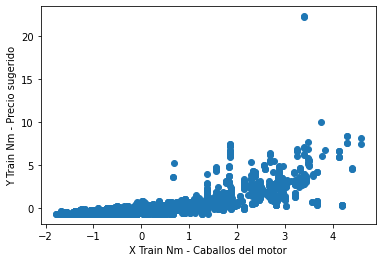

In [90]:
plt.scatter(x_train, y_train)
plt.xlabel('X Train Nm - Caballos del motor')
plt.ylabel('Y Train Nm - Precio sugerido')
plt.show()

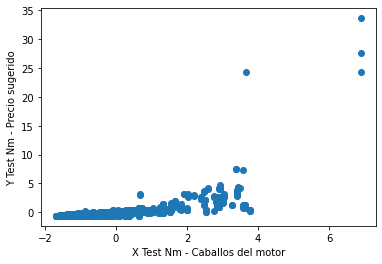

In [91]:
plt.scatter(x_test, y_test)
plt.xlabel('X Test Nm - Caballos del motor')
plt.ylabel('Y Test Nm - Precio sugerido')
plt.show()

### Costo
- el vector $\theta$
- $\theta_{0} + \theta_{1}x_{1}$ 

In [92]:
try:
    Thetas = np.zeros(x_train.shape[1])
except IndexError:
    # Caracteristica de una sola fila y la columna de puros      
    Thetas = np.zeros(2)

In [93]:
Thetas= Thetas.reshape(2,1)
Thetas

array([[0.],
       [0.]])

In [94]:
x_train = x_train.to_frame()

In [95]:
x_train

,Engine HP
0,0.784069
1,0.463532
2,0.463532
3,-0.177541
4,-0.177541
...,...
8348,-0.388180
8349,-0.388180
8350,-0.388180
8351,-0.974304


In [96]:
y_train=y_train.to_numpy()

In [97]:
# Añadir la columna de 1 al conjunto de entrenamiento
n_ones = np.ones([len(x_train), 1])
x_train = np.concatenate((n_ones, x_train), axis=1)
x_train

array([[ 1.        ,  0.78406872],
       [ 1.        ,  0.46353204],
       [ 1.        ,  0.46353204],
       ...,
       [ 1.        , -0.38817972],
       [ 1.        , -0.97430395],
       [ 1.        , -0.97430395]])

In [98]:
y_train

array([ 0.09274235,  0.00170627, -0.06966202, ..., -0.24476331,
       -0.34907721, -0.37720959])

Definiendo la Función de Costo y la función de Hipótesis $H_{\theta}(x)$
- Función de Costo:
$$
J(\theta)=J(\theta_{0},\theta_{1},\dots,\theta_{n})\\
J(\theta) = \frac{1}{2m}\sum_{i=0}^{m}( h_{\theta}(x^{(i)})-y^{(i)})^{2}
$$
- Hipótesis
$$
h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \dots + \theta_{n}x_{n} = \theta^{T}x
$$
<br>
$$
h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} 
$$

In [99]:
# Formula de la Hipotesis
def predict(thetas, x_data):
    return np.dot(x_data, thetas)

In [100]:
def fun_cost(x_data, y_result, theta):
    cost = 0
    # m
    len_data_x = x_data.shape[0]
    cost = 0

    predict_error = predict(theta, x_data) - y_result
    square_predict_error = np.power(predict_error, 2)

    sumatoria_error_cuadratico = np.sum(square_predict_error)
    cost = 1.0 / (2 * len_data_x) * sumatoria_error_cuadratico
    return cost

## Experimento 1: Se evaluará con los datos que se obtenga en la BD, se indicará el error cuadrático medio de la RL y graficar.

In [101]:
print("Error cuadrático medio con 0 0: ", fun_cost(x_train, y_train, Thetas))

Error cuadrático medio con 0 0:  3742.9069367298616


In [102]:
y_initial_predict = np.array([])
y_initial_predict

array([], dtype=float64)

In [103]:
y_initial_predict = predict(Thetas,x_train)
y_initial_predict.flatten()

array([0., 0., 0., ..., 0., 0., 0.])

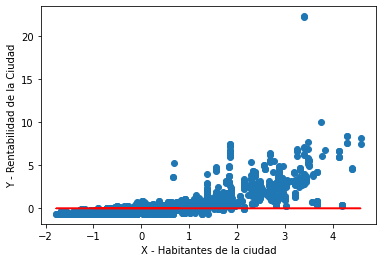

In [104]:
plt.plot(x_train, y_initial_predict, "r-")
plt.scatter(x_train[:,1], y_train)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

## Gradiente

In [105]:
x_train.shape

(8291, 2)

In [106]:
x_train

array([[ 1.        ,  0.78406872],
       [ 1.        ,  0.46353204],
       [ 1.        ,  0.46353204],
       ...,
       [ 1.        , -0.38817972],
       [ 1.        , -0.97430395],
       [ 1.        , -0.97430395]])

In [107]:
Thetas

array([[0.],
       [0.]])

In [108]:
x_train.T

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.78406872,  0.46353204,  0.46353204, ..., -0.38817972,
        -0.97430395, -0.97430395]])

In [109]:
predict(Thetas.flatten(),x_train)

array([0., 0., 0., ..., 0., 0., 0.])

<b>Gradiente</b>
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradientes</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [110]:
Thetas = Thetas.flatten()

In [111]:
# gradiente descendiente
def gradient_descent(x_data, y_data, thetas, learning_rate=0.01, iterations=100):
    m = len(y_data)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, len(thetas)))
    y_data = y_data.flatten()
    
    for it in range(iterations):
        # Hipotesis retornar array en una fila y no columna
        # por ello la "flatten" a la variable Thetas        
        prediction = predict(thetas.flatten(),x_data) #8921
        
        #x_data.T -> 2, 8291
        thetas = thetas - learning_rate * (1 / m) * (x_data.T.dot((prediction - y_data)))
        theta_history[it] = thetas
        cost_history[it] = fun_cost(x_data, y_data, thetas)


    return thetas, cost_history, theta_history

## Experimento 2: Se usarán para entrenamiento los que tengan mejores parámetros(50%), se indicará el error cuadrático medio de la RL y graficar y analizar la respuesta del error con respecto al primer entrenamiento.

In [112]:
theta,cost_history,theta_history = gradient_descent(x_train,y_train,Thetas,0.01,50)

In [113]:
print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [0.00713745 0.26901576]
Final Cost =  0.3041473079193759


In [114]:
theta,cost_history,theta_history = gradient_descent(x_train,y_train,Thetas,0.03,50)

In [115]:
print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [0.0163384  0.52718225]
Final Cost =  0.2328806144751873


In [116]:
theta,cost_history,theta_history = gradient_descent(x_train,y_train,Thetas,0.05,100)

In [117]:
print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [0.02395629 0.66251841]
Final Cost =  0.22295711659123113


In [118]:
theta, cost_history, theta_history = gradient_descent(x_train, y_train, Thetas, 0.05, 200)

In [119]:
print("Theta =", theta)
print("Final Cost = ", cost_history[-1])

Theta = [0.02433267 0.66588075]
Final Cost =  0.2229511774353978


In [120]:
iterations = 500

In [121]:
theta,cost_history,theta_history = gradient_descent(x_train,y_train,Thetas,0.03,iterations)

In [122]:
print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [0.02433608 0.66589788]
Final Cost =  0.22295117727705108


In [123]:
y_predict = predict(theta,x_train)
y_predict

array([ 0.54644578,  0.33300109,  0.33300109, ..., -0.23415197,
       -0.62445085, -0.62445085])

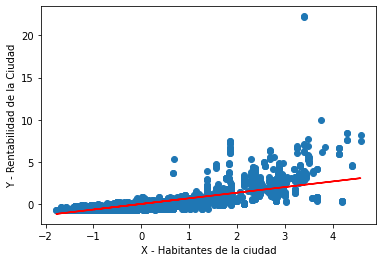

In [124]:
plt.plot(x_train[:,1], y_predict, "r-")
plt.scatter(x_train[:,1], y_train)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

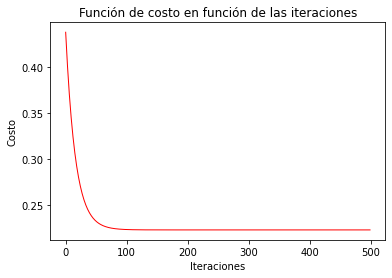

In [125]:
iterations = range(iterations)
plt.plot(iterations, cost_history, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()

### Análisis de experimento 2
**Con respecto al error del primer entrenamiento este arrrojo 0.3041473079193759 el cual fue un gran salto porque nos hemos acerdao a 0 este se realizo con los siguientes parametros: 0.01 de $\alpha$ y 50 iteraciones, si comparamos con el ultimo entrenamiento en el cual se obtuvo 0.22295117727705108 de error con los parametros de 0.03 de $\alpha$ y 300 iteraciones, mejorando la proximación hacia el 0 con respecto al primer entrenamiento pero siendo no muy relevante ya que la diferencia con el primer entrenamiento no es muy notable. Se nota un limite de mejora es decir que no se puede conseguir menor mejor costo debido principalmente al modelo el cual depende de solamente de 2 $\theta$ ($h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}$) no permitiendo explicar comportamiento completo de los datos.**

# Experimento 3: Se invertirá la división de datos, 30% entrenamiento y 70 prueba, indicar el error, realizar las gráficas y analizar la rpta con respecto al experimento 1.

In [126]:
x_test = x_test.to_frame()

In [127]:
n_zeros = np.ones([len(x_test), 1])
x_test = np.concatenate((n_zeros, x_test), axis=1)
x_test

array([[ 1.        , -0.97430395],
       [ 1.        , -0.97430395],
       [ 1.        , -0.38817972],
       ...,
       [ 1.        ,  0.46353204],
       [ 1.        ,  0.46353204],
       [ 1.        , -0.25996505]])

In [128]:
y_test = y_test.to_numpy()

In [129]:
print(" x_train Shape", x_train.shape)
print(" x_test Shape", x_test.shape)
print(" y_train Shape", y_train.shape)
print(" y_test Shape", y_test.shape)

 x_train Shape (8291, 2)
 x_test Shape (3553, 2)
 y_train Shape (8291,)
 y_test Shape (3553,)


In [130]:
x_temp , y_temp = x_train, y_train
x_train, y_train = x_test, y_test
x_test, y_test = x_temp , y_temp

In [131]:
print(" x_train Shape", x_train.shape)
print(" x_test Shape", x_test.shape)
print(" y_train Shape", y_train.shape)
print(" y_test Shape", y_test.shape)

 x_train Shape (3553, 2)
 x_test Shape (8291, 2)
 y_train Shape (3553,)
 y_test Shape (8291,)


In [132]:
theta,cost_history,theta_history = gradient_descent(x_train,y_train,Thetas,0.01,50)

print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [-0.01645622  0.24363097]
Final Cost =  0.49246625935616395


In [133]:
theta,cost_history,theta_history = gradient_descent(x_train,y_train,Thetas,0.03,50)
print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [-0.03744864  0.49461298]
Final Cost =  0.4256620768146927


In [134]:

theta,cost_history,theta_history = gradient_descent(x_train,y_train,Thetas,0.05,100)

print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [-0.05541149  0.64871405]
Final Cost =  0.413710937115284


In [135]:

theta,cost_history,theta_history = gradient_descent(x_train,y_train,Thetas,0.05,200)

print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [-0.05644711  0.65438874]
Final Cost =  0.4136953249902148


In [136]:
iterations = 500

In [137]:
theta,cost_history,theta_history = gradient_descent(x_train,y_train,Thetas,0.03,iterations)

print("Theta =",theta)
print("Final Cost = ",cost_history[-1])

Theta = [-0.05645945  0.65443891]
Final Cost =  0.4136953237362081


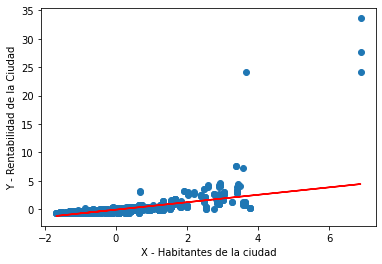

In [138]:
y_predict = predict(theta,x_train)
plt.plot(x_train[:,1], y_predict, "r-")
plt.scatter(x_train[:,1], y_train)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

In [139]:
theta

array([-0.05645945,  0.65443891])

In [140]:
cost_Test = fun_cost(x_test, y_test, theta)
print("Costo con data de prueba = ",cost_Test)

Costo con data de prueba =  0.22627142781439247


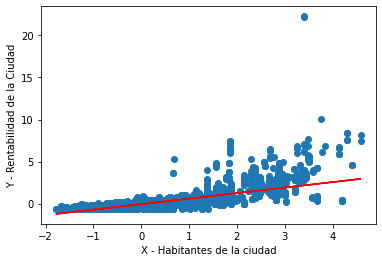

In [141]:
y_predict_test = predict(theta,x_test)

plt.plot(x_test[:,1], y_predict_test, "r-")
plt.scatter(x_test[:,1], y_test)
plt.xlabel('X - Habitantes de la ciudad')
plt.ylabel('Y - Rentabilidad de la Ciudad')
plt.show()

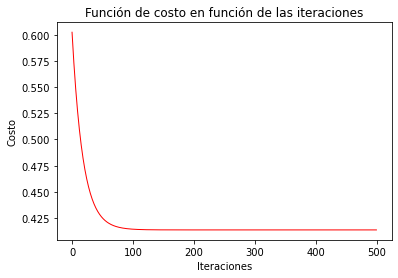

In [142]:
iterations = range(iterations)
plt.plot(iterations, cost_history, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()

### Análisis de experimento 3
**Con respecto al error del primer entrenamiento este arrrojo 0.49246625935616395 siendo alto a comparación de cuando los datos de entrenamiento y prueba no se cambiaron se obtuvo a traves de los siguientes parametros: 0.01 de $\alpha$ y 50 iteraciones,  El ultimo entrenamiento dio 0.4136953237362081 de error con los parametros de 0.03 de $\alpha$ y 300 iteraciones, se nota una barrera de no bajar los 0.4 por mas iteraciones que se hace no hay un salto relevante si bien es mas cercano al 0 que el primer entrenamiento no es sustancialmente diferenciable como cuando se hizo con el data entrenamiento sin intercambiar esto debe ser linitado porque ya no solo por el modelo 2 $\theta$ ($h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}$) sino por la cantidad de datos que estamos trabajando los cuales son menos.**
<br>
**Algo a resaltar es que probando con los datos de prueba es decir con los que tiene mayor cantidad de datos por el cambio obtenemos un similar valor de error que es 0.22627142781439247 es decir obtuvimos una mejor configuración equivalente a cuando lo utilizamos como entrenamiento que eran de 0.22295117727705108** <br>
**Si comparamos con el experimento 1 el cual tenia un costo de 3742.9069367298616 este siendo excesivamente alto y para nada mostraba el comportamiento de los datos, el experimento 3 es mejor y nos da un modelo que demuestra el comportamiento de los datos.**